# EDA 

In [1]:
# install the required packages
%pip install pandas numpy matplotlib seaborn

# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# set the style of the plots
plt.style.use('ggplot')



Note: you may need to restart the kernel to use updated packages.


In [2]:
# Loads the data from the csv file
df =pd.read_csv('./data/cleaned_merged_heart_dataset.csv')

In [3]:
# shows us the shape of the data
df.shape

(1888, 14)

In [4]:
# its a good idea to check the first few rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# check the names of the columns from the dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
# check the data types of the columns
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
# some information about the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,54.354343,0.688559,1.279131,131.549258,246.855403,0.148305,0.597458,149.424258,0.331568,1.053761,1.421610,0.731462,2.662606,0.517479
std,9.081505,0.463205,1.280877,17.556985,51.609329,0.355496,0.638820,23.006153,0.470901,1.161344,0.619588,1.015735,1.249924,0.499827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


### Step 2: Data Preperation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation


In [11]:
# check for missing values
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
# shows all the columns in the dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
# with # u can discomment the columns that you want to drop
df[['age', 
    'sex',
    'cp', 
    # 'trestbps', 
    # 'chol',
     'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]

,age,sex,cp,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,1,0,150,0,2.3,0,0,1,1
1,37,1,2,0,1,187,0,3.5,0,0,2,1
2,41,0,1,0,0,172,0,1.4,2,0,2,1
3,56,1,1,0,1,178,0,0.8,2,0,2,1
4,57,0,0,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1883,60,1,0,0,0,138,1,1.9,2,1,3,0
1884,46,1,0,0,1,120,1,1.8,1,2,3,0
1885,59,1,3,0,1,162,0,0.8,2,2,2,0
1886,54,1,1,0,0,164,0,0.0,2,1,2,0


In [19]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
# drop the columns that are not needed
df.drop(['thalachh'], axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,60,1,0,140,207,0,0,1,1.9,2,1,3,0
1884,46,1,0,140,311,0,1,1,1.8,1,2,3,0
1885,59,1,3,134,204,0,1,0,0.8,2,2,2,0
1886,54,1,1,154,232,0,0,0,0.0,2,1,2,0


In [24]:
# check the shape of the dataset
df.shape

(1888, 14)

In [ ]:
# copy the dataset as a new dataframe
df = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].copy()

In [27]:
# check the data time of one column name age
pd.to_datetime(df['age'])

0      1970-01-01 00:00:00.000000063
1      1970-01-01 00:00:00.000000037
2      1970-01-01 00:00:00.000000041
3      1970-01-01 00:00:00.000000056
4      1970-01-01 00:00:00.000000057
                    ...             
1883   1970-01-01 00:00:00.000000060
1884   1970-01-01 00:00:00.000000046
1885   1970-01-01 00:00:00.000000059
1886   1970-01-01 00:00:00.000000054
1887   1970-01-01 00:00:00.000000053
Name: age, Length: 1888, dtype: datetime64[ns]

In [29]:
# This means you are converting the column chol into a datetime format and storing the result in a new column cp
df['cp'] = pd.to_datetime(df['chol'])

In [ ]:
# Rename the columns
df.rename(columns = {'cp': 'Cp'}, inplace=True)


In [34]:
df.columns

Index(['age', 'sex', 'Cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [35]:
# check the first few rows of the dataset
df.head()

,age,sex,Cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,1970-01-01 00:00:00.000000233,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,1970-01-01 00:00:00.000000250,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1970-01-01 00:00:00.000000204,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1970-01-01 00:00:00.000000236,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,1970-01-01 00:00:00.000000354,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
# check the data types of the columns
df.isna()

,age,sex,Cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1884,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1885,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1886,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
# check the missing values in the dataset
df.isna().sum()

age         0
sex         0
Cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [38]:
# checks the duplicated values in the dataset
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1883    False
1884     True
1885     True
1886    False
1887    False
Length: 1888, dtype: bool

In [39]:
# Filters and displays only the rows in the DataFrame that are duplicates.
# Excludes the first occurrence of a duplicate by default.
df.loc[df.duplicated()]

,age,sex,Cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
164,38,1,1970-01-01 00:00:00.000000175,138,175,0,1,173,0,0.0,2,4,2,1
303,52,1,1970-01-01 00:00:00.000000212,125,212,0,1,168,0,1.0,2,2,3,0
304,53,1,1970-01-01 00:00:00.000000203,140,203,1,0,155,1,3.1,0,0,3,0
305,70,1,1970-01-01 00:00:00.000000174,145,174,0,1,125,1,2.6,0,0,3,0
306,61,1,1970-01-01 00:00:00.000000203,148,203,0,1,161,0,0.0,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,42,1,1970-01-01 00:00:00.000000315,136,315,0,1,125,1,1.8,1,0,1,0
1881,59,1,1970-01-01 00:00:00.000000218,126,218,1,1,134,0,2.2,1,1,1,0
1882,40,1,1970-01-01 00:00:00.000000223,152,223,0,1,181,0,0.0,2,0,3,0
1884,46,1,1970-01-01 00:00:00.000000311,140,311,0,1,120,1,1.8,1,2,3,0


In [40]:
# The command df.duplicated(subset=['age']) checks for duplicate rows in the 
# DataFrame based only on the values in the age column.
df.duplicated(subset=['age'])


0       False
1       False
2       False
3       False
4       False
        ...  
1883     True
1884     True
1885     True
1886     True
1887     True
Length: 1888, dtype: bool

In [41]:
# This command does not modify the original DataFrame. 
# It simply filters and displays rows where the age column contains duplicate values.
df.loc[df.duplicated(subset=['age'])]

,age,sex,Cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
5,57,1,1970-01-01 00:00:00.000000192,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1970-01-01 00:00:00.000000294,140,294,0,0,153,0,1.3,1,0,2,1
9,57,1,1970-01-01 00:00:00.000000168,150,168,0,1,174,0,1.6,2,0,2,1
16,58,0,1970-01-01 00:00:00.000000340,120,340,0,1,172,0,0.0,2,0,2,1
21,44,1,1970-01-01 00:00:00.000000233,130,233,0,1,179,1,0.4,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,60,1,1970-01-01 00:00:00.000000207,140,207,0,0,138,1,1.9,2,1,3,0
1884,46,1,1970-01-01 00:00:00.000000311,140,311,0,1,120,1,1.8,1,2,3,0
1885,59,1,1970-01-01 00:00:00.000000204,134,204,0,1,162,0,0.8,2,2,2,0
1886,54,1,1970-01-01 00:00:00.000000232,154,232,0,0,164,0,0.0,2,1,2,0


In [42]:
# The code df.query('age == 29') filters the DataFrame to return only the rows where the age column has a value of 29.
df.query('age == 29')

,age,sex,Cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
72,29,1,1970-01-01 00:00:00.000000204,130,204,0,0,202,0,0.0,2,0,2,1
363,29,1,1970-01-01 00:00:00.000000204,130,204,0,0,202,0,0.0,2,0,2,1
367,29,1,1970-01-01 00:00:00.000000204,130,204,0,0,202,0,0.0,2,0,2,1
421,29,1,1970-01-01 00:00:00.000000204,130,204,0,0,202,0,0.0,2,0,2,1
971,29,1,1970-01-01 00:00:00.000000204,130,204,0,0,202,0,0.0,2,0,2,1
1543,29,1,1970-01-01 00:00:00.000000204,130,204,0,2,202,0,0.0,1,0,3,0
1671,29,1,1970-01-01 00:00:00.000000204,130,204,0,0,202,0,0.0,2,0,2,1


- Plotting Featuresn Distributons
- Histogram
- KDE
- Boxplot


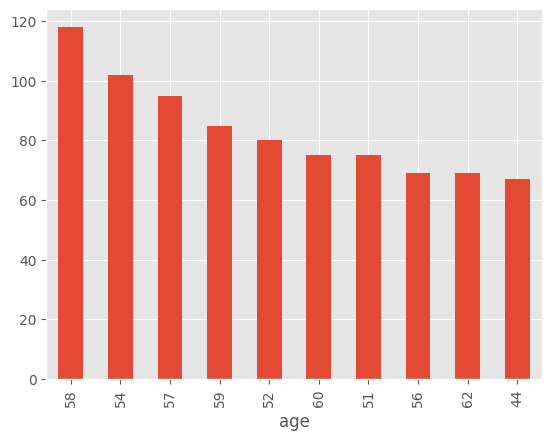

In [8]:
ax = df ['age'].value_counts() \
    .head(10) \
    .plot(kind='bar')

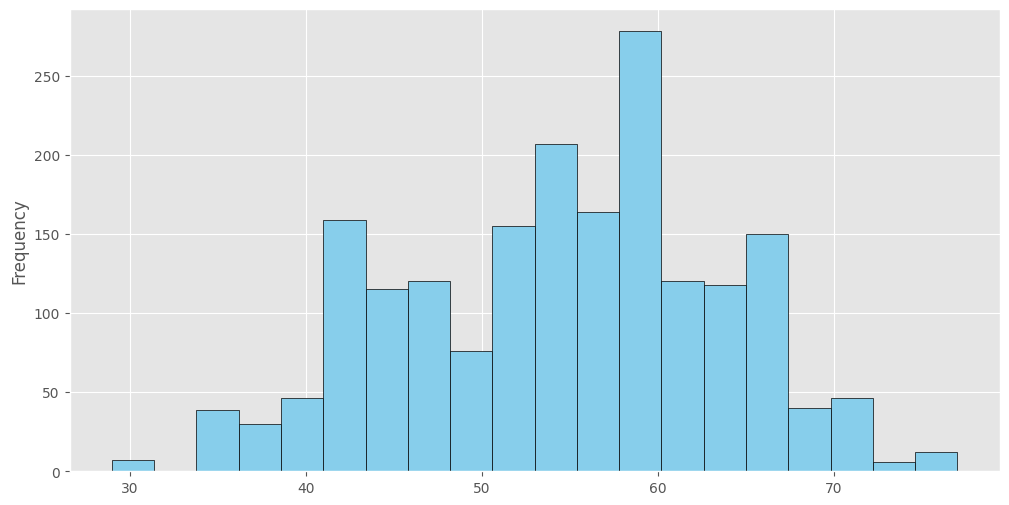

In [15]:

ax = df['age'].plot(kind='hist', bins=20, figsize=(12,6), color='skyblue', edgecolor='black')

- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby Comparisons

<Axes: xlabel='age', ylabel='chol'>

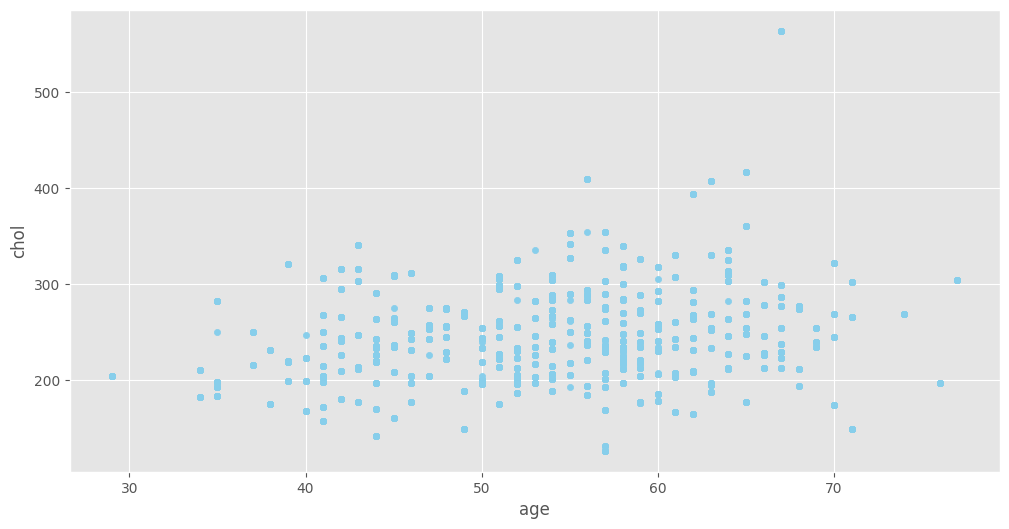

In [16]:
df.plot(kind='scatter', x='age', y='chol', figsize=(12,6), color='skyblue')

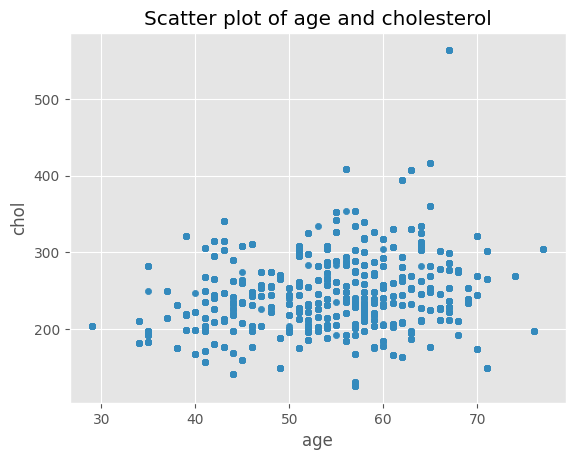

In [17]:
df.plot(kind='scatter', x='age', y='chol', title='Scatter plot of age and cholesterol')
plt.show()

<Axes: xlabel='age', ylabel='chol'>

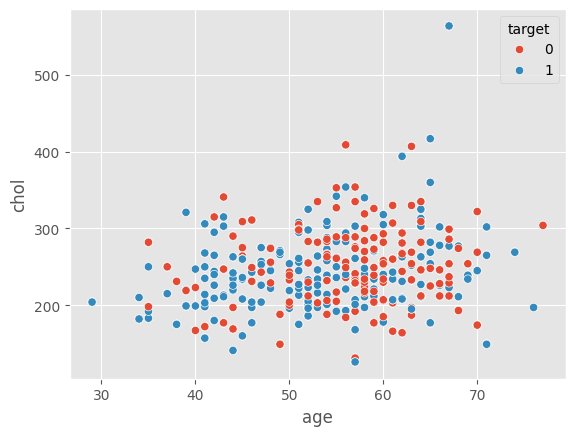

In [18]:
sns.scatterplot(data=df, x='age', y='chol', hue='target')

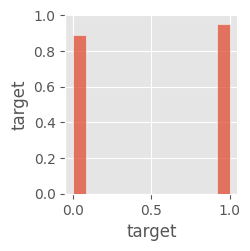

In [19]:
sns.pairplot(df, vars=['target'])

In [20]:
plot.show()

NameError: name 'plot' is not defined

In [21]:
plt.show()


In [22]:
df.corr=df[['age', 'chol']].dropna().corr()
df.corr

,age,chol
age,1.000000,0.221379
chol,0.221379,1.000000


<Axes: >

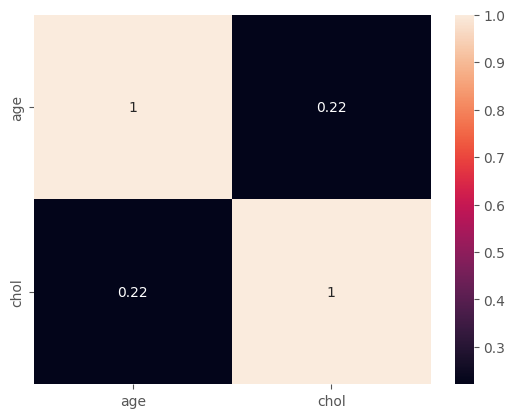

In [23]:
sns.heatmap(df.corr, annot=True)

- This will generate a heatmap where each cell contains the correlation coefficient between the corresponding columns.

In [24]:
df.head

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0      63    1   3       145   233    1        0       150      0      2.3   
1      37    1   2       130   250    0        1       187      0      3.5   
2      41    0   1       130   204    0        0       172      0      1.4   
3      56    1   1       120   236    0        1       178      0      0.8   
4      57    0   0       120   354    0        1       163      1      0.6   
...   ...  ...  ..       ...   ...  ...      ...       ...    ...      ...   
1883   60    1   0       140   207    0        0       138      1      1.9   
1884   46    1   0       140   311    0        1       120      1      1.8   
1885   59    1   3       134   204    0        1       162      0      0.8   
1886   54    1   1       154   232    0        0       164      0      0.0   
1887   53    1   0       110   335    0        1       143      1      3.0   

      slope  ca  thal  target  
0

In [30]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')